# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-21 17:05:34--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.07s  

2016-10-21 17:05:34 (71.6 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

In [2]:
#change the csv name
!mv abq-food-inspections-fy2010.csv data.csv

In [3]:
#take a look at columns
!csvcut -n data.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


In [4]:
#take a look at a sample of rows
!head -n2 data.csv | tail -n1 | csvcut -n

  1: 00BSAY IT WITH CAKE
  2: 50534
  3: 10200 GOLF COURSE RD NW STE B
  4: ALBUQUERQUE
  5: NM
  6: 87114
  7: 47341
  8: OOBSAY IT WITH CAKE
  9: CAKE DECORATING
 10: 10200
 11: GOLF COURSE
 12: RD
 13: NW
 14: 5058339563
 15: 0405
 16: Food Processor
 17: 2009-10-21 00:00:00
 18: 
 19: EMERGENCY RESPONSE
 20: DA8009125
 21: 00
 22: NON-GRADED
 23: 00
 24: NOT APPLICABLE
 25:     68    
 26: Delivered Informational Brochure
 27: 


#### Using Pandas and Seaborn for exploration

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib inline 
sns.set()

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### Basic Infomation about the dataset

In [6]:
!csvstat data.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		80949:	68
		32817:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: 87, NM
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

In [7]:
df_inspection = pd.read_csv('data.csv', parse_dates=['INSPECTION_DATE'])

In [8]:
print("Row: {}\nColumn: {}".format(*df_inspection.shape))

Row: 17556
Column: 27


In [9]:
#data type of each column
df_inspection.dtypes

FACILITY_NAME                           object
FACILITY_KEY                             int64
SITE_ADDRESS                            object
CITY                                    object
STATE                                   object
ZIP                                     object
OWNER_KEY                                int64
OWNER_NAME                              object
NATURE_OF_BUSINESS                      object
STREET_NUMBER                           object
STREET_NAME                             object
STREET_TYPE                             object
POST_DIRECTIONAL                        object
PHONE                                  float64
PROGRAM_CATEGORY                         int64
PROGRAM_CATEGORY_DESCRIPTION            object
INSPECTION_DATE                 datetime64[ns]
INSPECTION_TYPE                        float64
INSPECTION_DESC                         object
SERIAL_NUM                              object
ACTION_CODE                              int64
ACTION_DESC  

### Meaning of Each Column
There are two general types, facility-related and inpsection-related, of  information in this dataset. If we normalize the dataset,  there are seven columns can potentially serve as a primary key for each table in our data model. They are FACILITY_KEY, OWNER_KEY, PROGRAM_CATEGORY,  SERIAL_NUM, ACTION_CODE, RESULT_CODE and VIOLATION_CODE. They can also serve as foreign keys in our tables. 

### Are there null values?


In [10]:
df_inspection.isnull().sum()

FACILITY_NAME                       0
FACILITY_KEY                        0
SITE_ADDRESS                       15
CITY                                0
STATE                               0
ZIP                                 0
OWNER_KEY                           0
OWNER_NAME                          0
NATURE_OF_BUSINESS                429
STREET_NUMBER                      15
STREET_NAME                        15
STREET_TYPE                      1517
POST_DIRECTIONAL                  167
PHONE                            1426
PROGRAM_CATEGORY                    0
PROGRAM_CATEGORY_DESCRIPTION       96
INSPECTION_DATE                     0
INSPECTION_TYPE                 17556
INSPECTION_DESC                     0
SERIAL_NUM                          0
ACTION_CODE                         0
ACTION_DESC                         0
RESULT_CODE                         0
RESULT_DESC                         0
VIOLATION_CODE                   1008
VIOLATION_DESC                   1009
INSPECTION_M

INSPECTION_TYP and INSPECTION_MEMO  have only null values 

### Which columns interest you the most?
I am most interested in PROGRAM_CATEGORY_DESCRIPTION, ACTION_DESC, RESULT_DESC, and VIOLATION_DESC because I want to see violations of different types of businesses.  


### Which columns present some complications or questions you would like to ask?
The SERIAL_NUM column can post some challenges since one inspection can have multiple records with either a same serial number or different nubmers.   

In [11]:
df_gr = df_inspection.groupby(['OWNER_KEY', 'INSPECTION_DATE'])

In [12]:
df_gr.SERIAL_NUM.count().sort(inplace=False, ascending=False).head(5)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


OWNER_KEY  INSPECTION_DATE
80274      2010-06-25         65
           2010-03-19         65
73886      2010-06-27         61
610        2009-12-16         61
84586      2010-06-14         61
Name: SERIAL_NUM, dtype: int64

In [13]:
df_inspection.query("OWNER_KEY==80274 & INSPECTION_DATE=='2010-06-25'")

,FACILITY_NAME,FACILITY_KEY,SITE_ADDRESS,CITY,STATE,ZIP,OWNER_KEY,OWNER_NAME,NATURE_OF_BUSINESS,STREET_NUMBER,...,INSPECTION_TYPE,INSPECTION_DESC,SERIAL_NUM,ACTION_CODE,ACTION_DESC,RESULT_CODE,RESULT_DESC,VIOLATION_CODE,VIOLATION_DESC,INSPECTION_MEMO
2505,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045128,11,APPROVED,3,IN COMPLIANCE,02,Hot Holding,NaN
2506,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045128,11,APPROVED,3,IN COMPLIANCE,21,Improper sanitizing,NaN
2507,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045128,11,APPROVED,3,IN COMPLIANCE,45,"Floors, Walls, Ceilings",NaN
2508,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045128,11,APPROVED,3,IN COMPLIANCE,55,Additional Comments,NaN
2509,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045676,11,APPROVED,3,IN COMPLIANCE,04 00,No Violations Found,NaN
2510,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045676,11,APPROVED,3,IN COMPLIANCE,04 01,Cold Holding,NaN
2511,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045676,11,APPROVED,3,IN COMPLIANCE,04 02,Hot Holding,NaN
2512,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045676,11,APPROVED,3,IN COMPLIANCE,04 03,Reheating Temp,NaN
2513,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045676,11,APPROVED,3,IN COMPLIANCE,04 04,Cooking Temperatures,NaN
2514,CIRCLE K 8936,91825,5210 CENTRAL AV SE,ALBUQUERQUE,NM,87108,80274,CIRCLE K STORES INC,CONVIENENCE STORE,5210,...,NaN,New Business Inspection,DA0045676,11,APPROVED,3,IN COMPLIANCE,04 05,"Cooling, Heating Procedures",NaN


## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [15]:
%load_ext sql
!echo 'redspot' | sudo -S service postgresql restart
!createdb -U dbuser wei_ex

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [16]:
%sql postgresql://dbuser@localhost:5432/wei_ex

'Connected: dbuser@wei_ex'

In [17]:
%%sql
DROP TABLE IF EXISTS inspection;
CREATE TABLE inspection (
    facility_name text,
    facility_key VARCHAR(6),
    site_address VARCHAR(128),
    city VARCHAR(50),
    state CHAR(2),
    zip VARCHAR(10),
    owner_key CHAR(5),
    owner_name VARCHAR(128),
    nature_of_business VARCHAR(64),
    street_number VARCHAR(15),
    street_name VARCHAR(64),
    street_type VARCHAR(15),
    post_directional CHAR(2),
    phone VARCHAR(25),
    program_category VARCHAR(4),
    program_category_description TEXT,
    inspection_date TIMESTAMP(0),
    inspection_type CHAR(20),
    inspection_desc VARCHAR(64),
    serial_num CHAR(9),
    action_code VARCHAR(4),
    action_desc VARCHAR(64),
    result_code VARCHAR(4),
    result_desc VARCHAR(64),
    violation_code VARCHAR(20),
    violation_desc VARCHAR(64),
    inspection_memo TEXT
);

Done.
Done.


[]

In [18]:
!pwd

/home/jovyan/work


#### Using pandas strip white spaces  

In [20]:
%%sql
COPY inspection FROM '/home/jovyan/work/data.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [21]:
%%sql 
Select count(*)
From inspection;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

### What are the top 10 violation?


In [22]:
%%sql
Select violation_desc, count(*)
From inspection
Where violation_desc not in ('No Violations Found', 'None', 'Additional Comments', 'Delivered Informational Brochure') 
Group By(violation_desc)
Order by count desc
Limit 10;

10 rows affected.


violation_desc,count
Plumbing: Improperly installed/maintained/supplied,492
Non-Food contact surfaces,446
Improper sanitizing,434
Food unprotected,425
"Floors, Walls, Ceilings",406
Food contact surfaces,251
Cold Holding,201
"Thermometers not provided, not accurate/consp",183
Hot Holding,175
Other Operations - Lighting,142


### What are frequencies of those violations for each facilty type?

In [23]:
%%sql 
Select  violation_desc, program_category_description as f_type, count(*)
From inspection
where violation_desc in (
        select violation_desc
        from 
            (Select violation_desc, count(*)
            From inspection
            Where violation_desc not in ('No Violations Found', 'None', 'Additional Comments', 'Delivered Informational Brochure') 
            Group By(violation_desc)
            Order by count desc
            Limit 10) as top_10
        )
    And program_category_description <> 'None'
Group By f_type, violation_desc

185 rows affected.


violation_desc,f_type,count
Food contact surfaces,Food Service Establishment,150
Plumbing: Improperly installed/maintained/supplied,Food Processor,11
Plumbing: Improperly installed/maintained/supplied,Food Service Establishment,254
Food contact surfaces,Food Processor,3
Non-Food contact surfaces,Food Service Establishment,282
Improper sanitizing,Bakery,10
Non-Food contact surfaces,Food Processor,9
Non-Food contact surfaces,Frozen Food Truck,1
Other Operations - Lighting,Retail - Deli,1
Cold Holding,Mobile Pre-Packaged,1


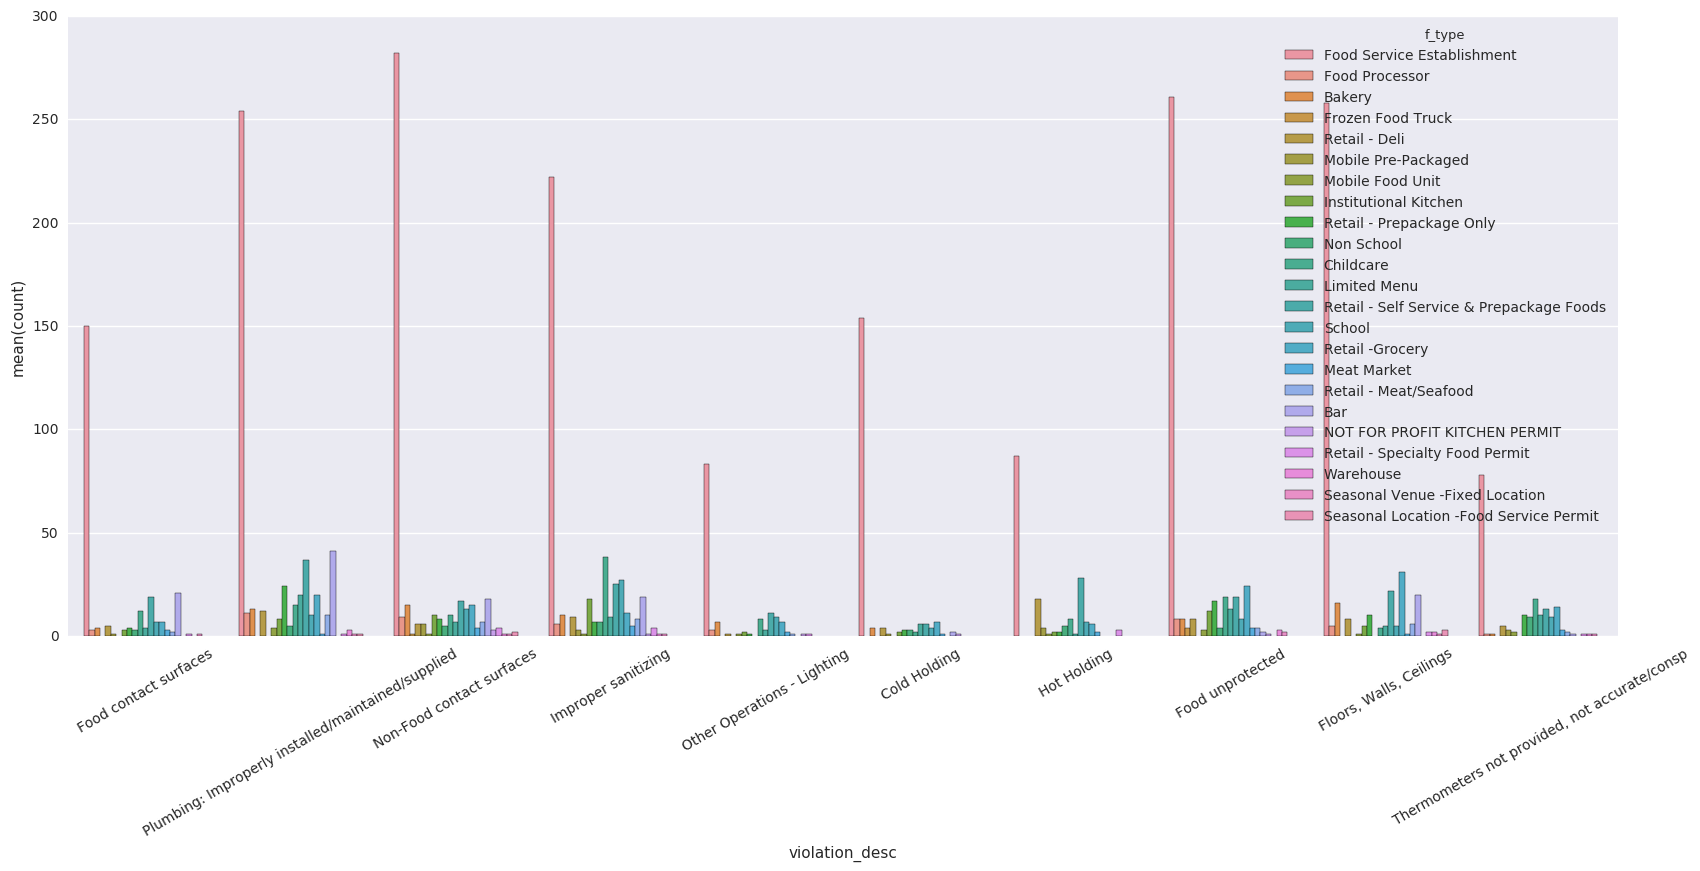

In [24]:
rc('figure', figsize=(20, 8))
df_v_t = _.DataFrame()
splt = sns.barplot(x='violation_desc', y='count', hue='f_type', data=df_v_t)
labels = [l for l in splt.get_xmajorticklabels()]
splt.set_xticklabels(labels, rotation=30)

It seems that Food Service Establishment has much more violations than other facility types for each violation type. Maybe it is because most failities are food service establishments. 

In [25]:
%%sql
Select program_category_description as f_type, count(program_category_description) as total_count
From 
    (Select Distinct On 
        (facility_key) program_category_description
     From Inspection) as p
Where program_category_description <> 'None'
Group By f_type;

24 rows affected.


f_type,total_count
Retail - Prepackage Only,165
Food Service Establishment,1344
Frozen Food Truck,4
NOT FOR PROFIT KITCHEN PERMIT,16
Warehouse,51
School,133
Meat Market,14
Limited Menu,55
Seasonal Venue -Fixed Location,15
Non School,54


### Using total counts of each facility type to normalize violation frquency 

In [26]:
%%sql 
Select  program_category_description as f_type, count(*) as f_type_total_count
From inspection
where violation_desc in (
        select violation_desc
        from 
            (Select violation_desc, count(*)
            From inspection
            Where violation_desc not in ('No Violations Found', 'None', 'Additional Comments', 'Delivered Informational Brochure') 
            Group By(violation_desc)
            Order by count desc
            Limit 10) as top_10
        )
    And program_category_description <> 'None'
Group By f_type

23 rows affected.


f_type,f_type_total_count
School,99
Meat Market,26
Retail -Grocery,142
Retail - Prepackage Only,86
Food Service Establishment,1829
Food Processor,46
Warehouse,11
Frozen Food Truck,5
Retail - Specialty Food Permit,17
NOT FOR PROFIT KITCHEN PERMIT,7


In [27]:
df_t_c = _.DataFrame()
df_v_t_c = pd.merge(df_v_t, df_t_c, on='f_type')
df_v_t_c['percent'] = df_v_t_c['count'] / df_v_t_c['f_type_total_count']  * 100

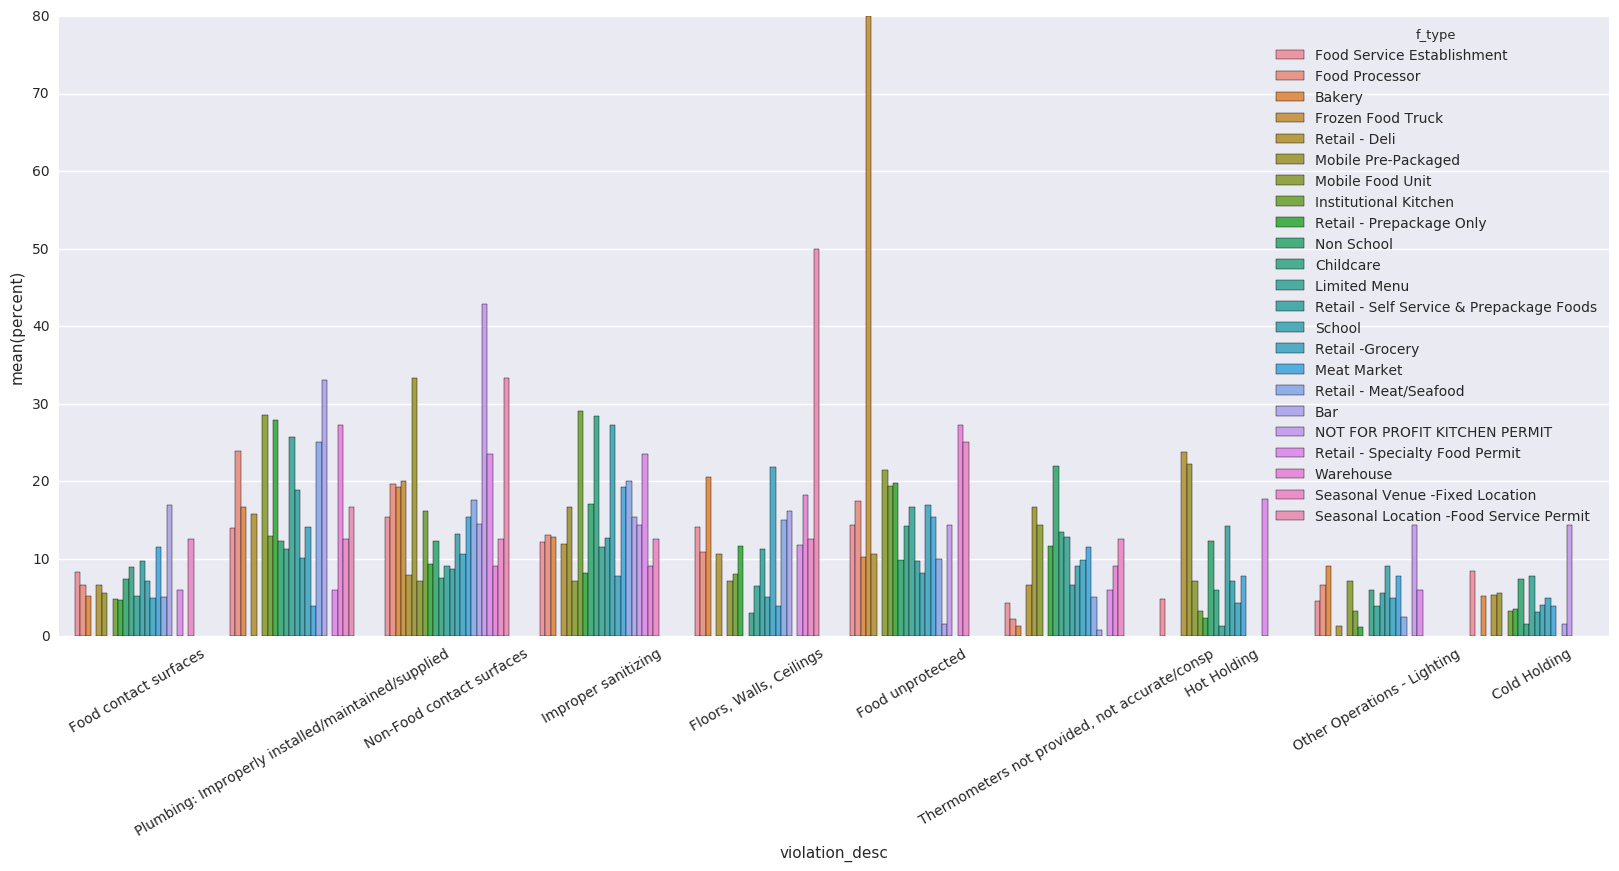

In [28]:
splt = sns.barplot(x='violation_desc', y='percent', hue='f_type', data=df_v_t_c)
labels = [l for l in splt.get_xmajorticklabels()]
splt.set_xticklabels(labels, rotation=30)

Compared to other facility type, the violation distribution of food service establishments among violation types are more spead out. For example, 80% of frozen food truck's violations are for food unproected. But maybe it is because there are only five inpection instances for that.

### What are the monthly trends of those violations?

In [29]:
%%sql 
Select date_part('year', inspection_date)::text||'-'||date_part('month', inspection_date)::text||'-01' as month, violation_desc, count(*)
From inspection
where violation_desc in (
        select violation_desc
        from 
            (Select violation_desc, count(*)
            From inspection
            Where violation_desc not in ('No Violations Found', 'None', 'Additional Comments', 'Delivered Informational Brochure') 
            Group By(violation_desc)
            Order by count desc
            Limit 10) as top_10
        )
Group By month, violation_desc

120 rows affected.


month,violation_desc,count
2010-5-01,Other Operations - Lighting,2
2009-9-01,"Thermometers not provided, not accurate/consp",17
2010-6-01,Food contact surfaces,13
2010-6-01,Improper sanitizing,22
2010-1-01,Other Operations - Lighting,11
2009-9-01,Food unprotected,29
2010-5-01,Food unprotected,22
2010-1-01,"Thermometers not provided, not accurate/consp",20
2010-4-01,Food contact surfaces,29
2010-4-01,Improper sanitizing,30


In [30]:
df = _.DataFrame()
df.dtypes

month             object
violation_desc    object
count              int64
dtype: object

In [31]:
df['month'] = pd.to_datetime(df.month)

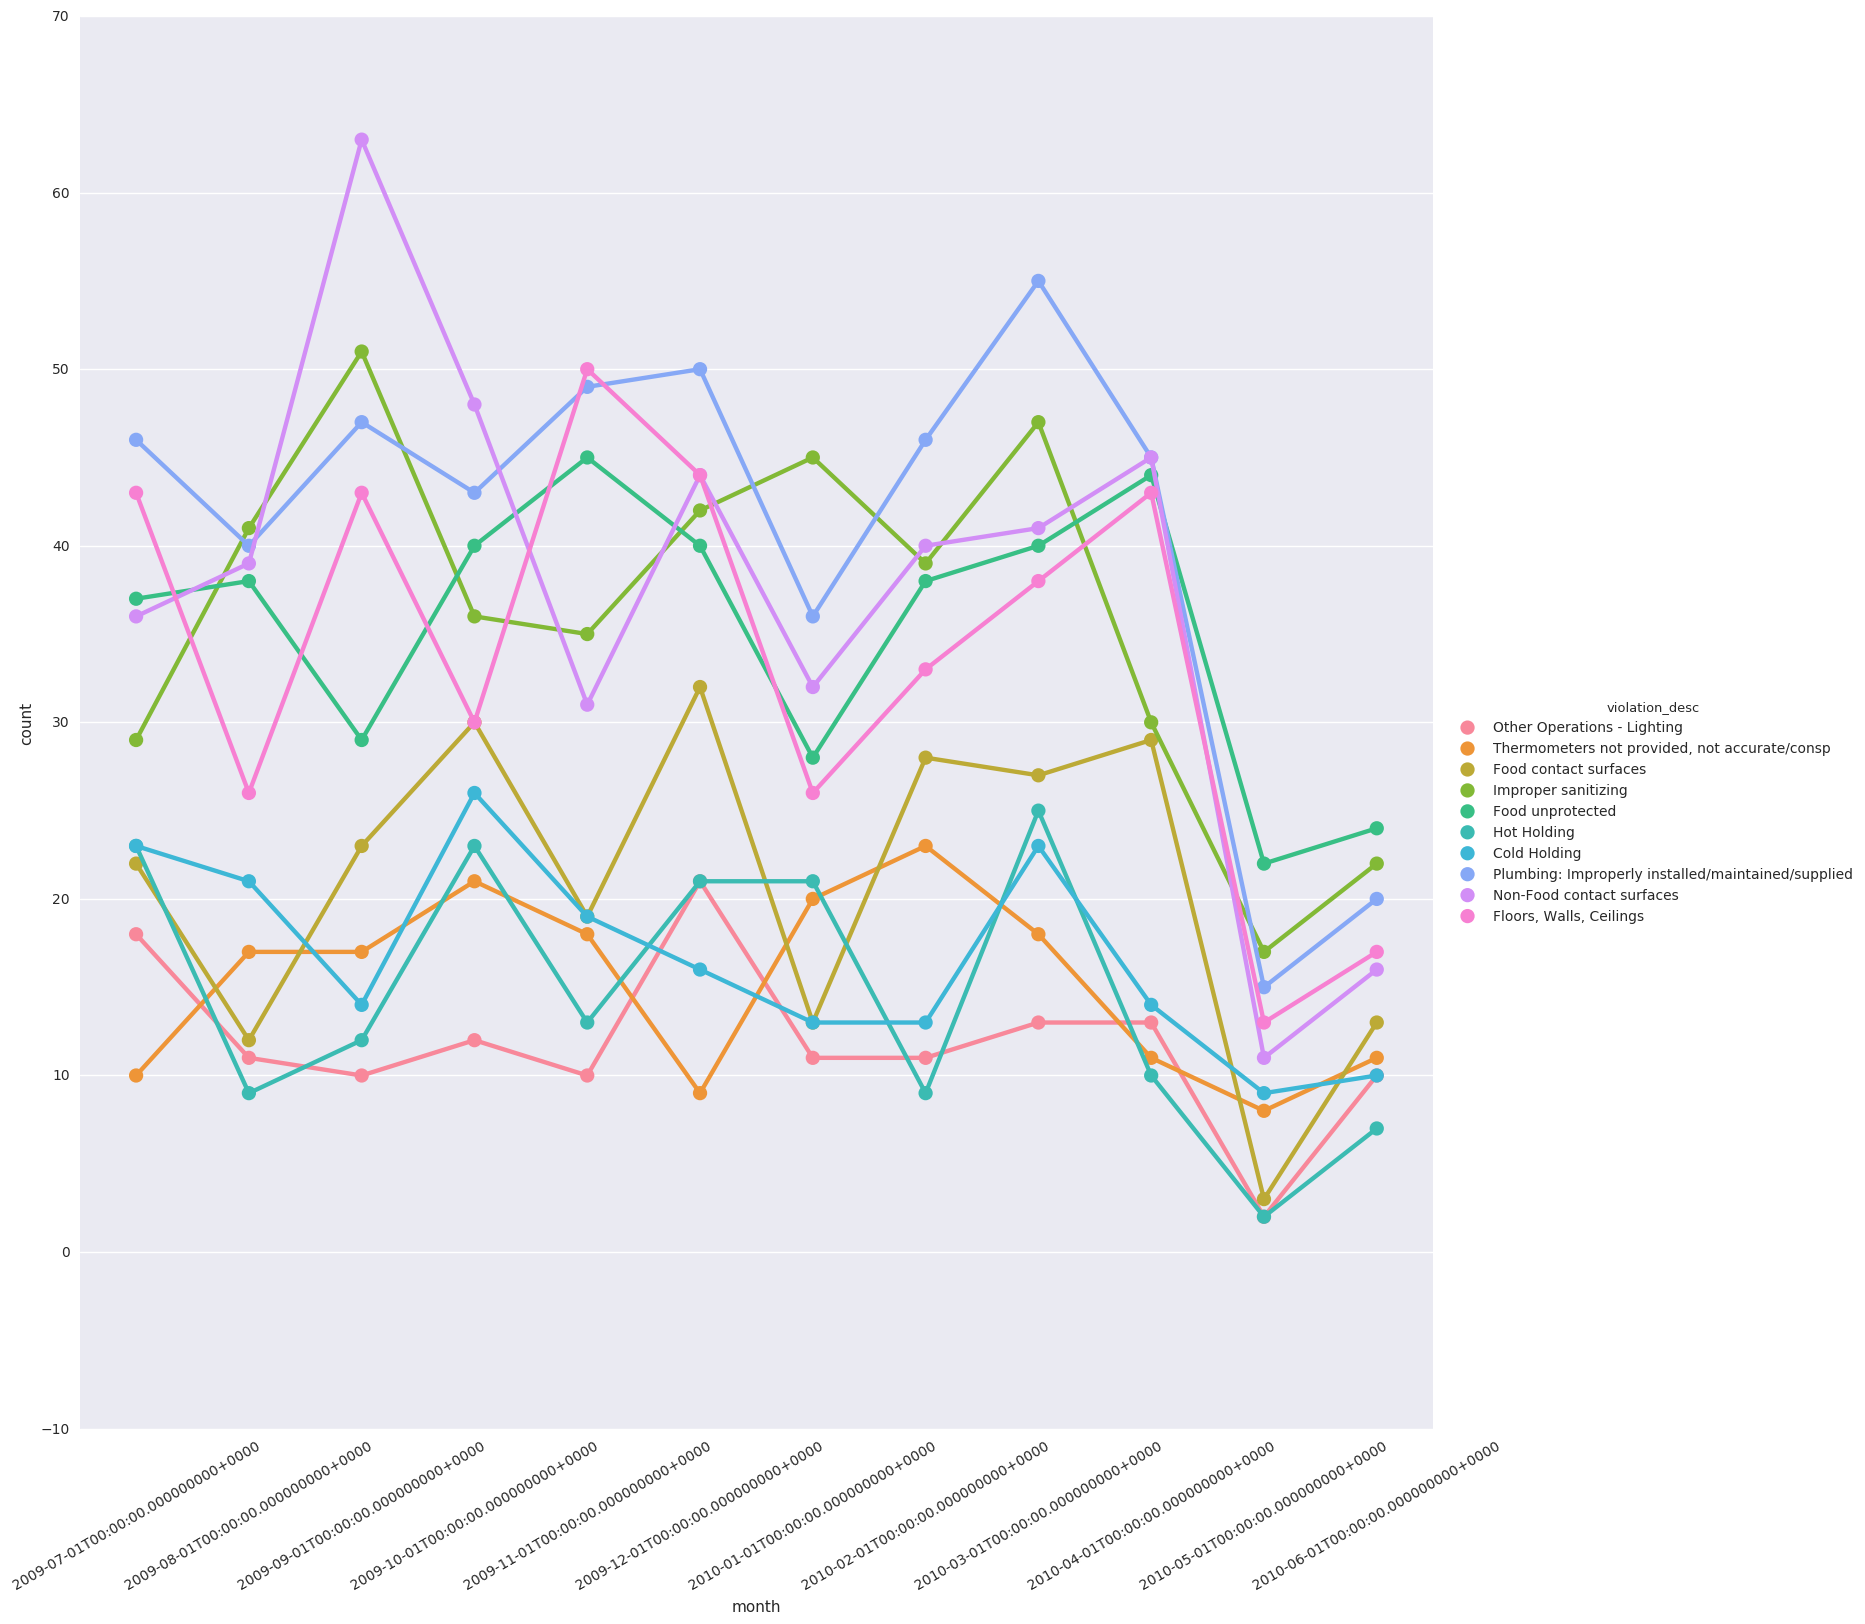

In [32]:
rc('figure', figsize=(15,6))
fig = sns.factorplot(x='month', y='count', hue='violation_desc', data=df, size=15)
fig.set_xticklabels(rotation=30)

Since we only have one year of data and do not know what inspection frequency for a facility is, we cannot conculde  if the violations are increaseing or decreasing. For example, the highest number of 'Floors, Walls, Celings' violations happened in Aug, 2009.
The inpsectors may visit some big offenders in that month. If those facilities are inpsected annually, we may want to look at Aug, 2010 data to see if the those facilities were inspected again.

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

#### Take facility related data out  of the table

In [33]:
%%sql
Drop Table if Exists facility;
Select Distinct ON
    (facility_key) 
    facility_name,
    facility_key,
    site_address,
    city,
    state,
    zip,
    owner_key,
    owner_name,
    nature_of_business,
    street_number,
    street_name,
    street_type,
    post_directional,
    phone
Into facility
From inspection;

Done.
2835 rows affected.


[]

In [34]:
%%sql
Select count(*)
From facility;

1 rows affected.


count
2835


### Drop columns and left facility_key as the foreign key

In [35]:
%%sql 
Alter table inspection
    Drop Column facility_name,
    Drop Column site_address,
    Drop Column city,
    Drop Column state,
    Drop Column zip,
    Drop Column owner_key,
    Drop Column owner_name,
    Drop Column nature_of_business,
    Drop Column street_number,
    Drop Column street_name,
    Drop Column street_type,
    Drop Column post_directional,
    Drop Column phone;

Done.


[]

In [36]:
%%sql
Alter table facility 
Add Primary Key(facility_key);

Done.


[]

In [37]:
%%sql
Alter table inspection
Add CONSTRAINT facfk 
Foreign Key (facility_key) 
References facility (facility_key) MATCH FULL;

Done.


[]